# 필수 라이브러리 설치

In [ ]:
import random
import numpy as np

# Grid World

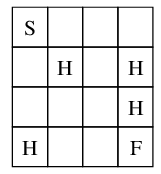

In [ ]:
# model 설정
# 4x4, state는 (x, y), H:hole, G:goal
# reward: goal:1 이며 나머지는 0
#
#     0  1  2  3
#     4  H  6  H
#     8  9 10  H
#     H 12 13  G
#
class GridWorld():
    def __init__(self):
        self.x = 0
        self.y = 0

    def step(self, a):
        # 0번 액션: 왼쪽, 1번 액션: 위, 2번 액션: 오른쪽, 3번 액션: 아래쪽
        if a == 0:
            self.move_left()
        elif a == 1:
            self.move_down()
        elif a == 2:
            self.move_right()
        elif a == 3:
            self.move_up()

        if self.x == 3 and self.y == 3:
            reward = 1
        else:
            reward = 0

        done = self.is_done()
        return (self.x, self.y), reward, done

    # 움직임 정의
    def move_down(self):
        self.y += 1
        if self.y > 3:
            self.y = 3

    def move_up(self):
        self.y -= 1
        if self.y < 0:
            self.y = 0

    def move_left(self):
        self.x -= 1
        if self.x < 0:
            self.x = 0

    def move_right(self):
        self.x += 1
        if self.x > 3:
            self.x = 3

    def is_done(self):
        if self.x == 3 and self.y == 3:
            return True
        elif self.x == 0 and self.y == 3:
            return True
        elif self.x == 1 and self.y == 1:
            return True
        elif self.x == 3 and self.y == 1:
            return True
        elif self.x == 3 and self.y == 2:
            return True
        else:
            return False

    def get_state(self):
        return (self.x, self.y)

    def reset(self):
        self.x = 0
        self.y = 0
        return (self.x, self.y)

# Agent

In [ ]:
class Agent():
    def __init__(self):
        pass

    def select_action(self):
        coin = random.random()
        if coin < 0.25:
            action = 0
        elif coin < 0.5:
            action = 1
        elif coin < 0.75:
            action = 2
        else:
            action = 3
        return action

# Monte Carlo

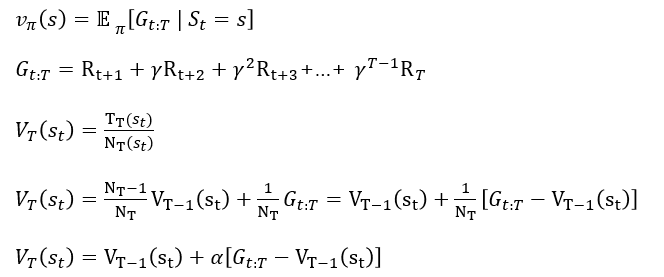

In [ ]:
def mc():
    env = GridWorld()
    agent = Agent()
    V = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
    gamma = 1.0
    alpha = 0.001

    for k in range(50000):
        done = False
        history = []

        while not done:
            action = agent.select_action()
            (x, y), reward, done = env.step(action)
            history.append((x, y, reward))
        env.reset()

        cum_reward = 0
        for transition in history[::-1]:
            x, y, reward = transition
            V[y][x] = V[y][x] + alpha * (cum_reward - V[y][x])
            cum_reward = reward + gamma * cum_reward
    print('MC prediction')
    for row in range(len(V)):
        for col in range(len(V[row])):
            print('%4.4f '%V[row][col], end='   ')
        print('')

# Temporal Difference

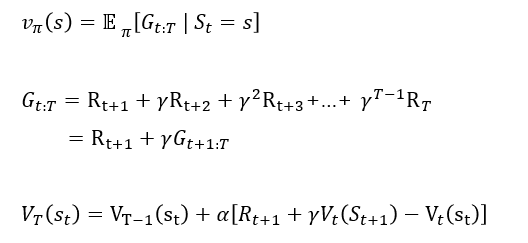

In [ ]:
def td():
    # TD
    env = GridWorld()
    agent = Agent()
    V = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
    gamma = 1.0
    reward = -1
    alpha = 0.01

    for k in range(50000):
        done = False
        while not done:
            x, y = env.get_state()
            action = agent.select_action()
            (x_prime, y_prime), reward, done = env.step(action)
            x_prime, y_prime = env.get_state()
            V[y][x] = V[y][x] + alpha * (reward + gamma * V[y_prime][x_prime] - V[y][x])
        env.reset()

    print('TD prediction')
    for row in range(len(V)):
        for col in range(len(V[row])):
            print('%4.4f '%V[row][col], end='   ')
        print('')

# Main

In [ ]:
if __name__ == '__main__':
    mc()
    td()